<a href="https://colab.research.google.com/github/ovllya126/UTS_ML2019_ID13307095/blob/master/A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import io
import requests

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

import seaborn as sns;
sns.set()

from sklearn import preprocessing
from google.colab import files

In [18]:
url = 'https://raw.githubusercontent.com/ovllya126/UTS_ML2019_ID13307095/master/steam_training.csv'
url_s = requests.get(url).text
st = pd.read_csv(io.StringIO(url_s))
st.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners
0,1,Counter-Strike,1/11/00,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,7.19,10000000-20000000
1,2,Team Fortress Classic,1/4/99,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,3.99,5000000-10000000
2,3,Day of Defeat,1/5/03,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,3.99,5000000-10000000
3,4,Deathmatch Classic,1/6/01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,3.99,5000000-10000000
4,5,Half-Life: Opposing Force,1/11/99,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,3.99,5000000-10000000


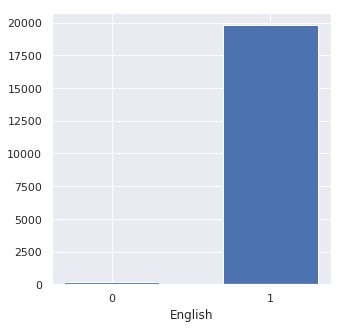

In [8]:
#attributes exploration
#plot 'english'

plt.figure(figsize=(5,5))
bins = np.arange(3) - 0.5
plt.hist(st.english, bins, rwidth = 0.6)

plt.xticks([0,1])
plt.xlabel('English')
plt.show()

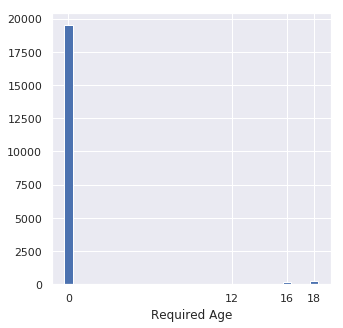

In [11]:
#plot 'required_age'
plt.figure(figsize=(5,5))
bins = np.arange(20) - 0.5
plt.hist(st.required_age, bins, rwidth = 0.6)

plt.xticks([0,12,16,18])
plt.xlabel('Required Age')
plt.show()

In [12]:
st.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,20000.000000,20000.00000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,0.98935,0.412900,41.388900,1.328045e+03,277.766900,196.116900,189.219350,6.605311
std,5773.647028,0.10265,2.587614,317.345084,2.208055e+04,4981.099289,2098.406866,2687.030391,7.885331
min,1.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5000.750000,1.00000,0.000000,0.000000,1.100000e+01,4.000000,0.000000,0.000000,1.990000
50%,10000.500000,1.00000,0.000000,9.000000,4.000000e+01,15.000000,0.000000,0.000000,4.790000
75%,15000.250000,1.00000,0.000000,25.000000,2.040000e+02,66.000000,30.250000,31.250000,7.990000
max,20000.000000,1.00000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.000000,303.990000


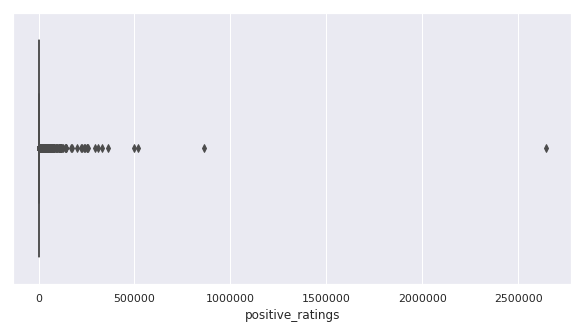

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(st.positive_ratings)

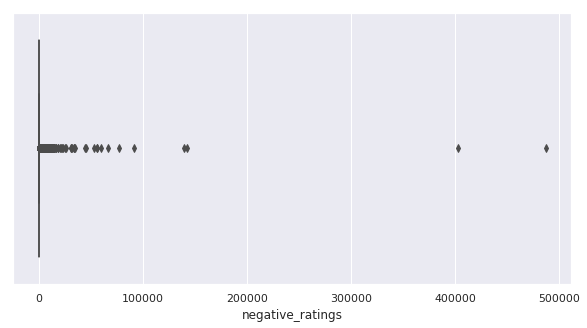

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(st.negative_ratings)

Text(0, 0.5, 'number')

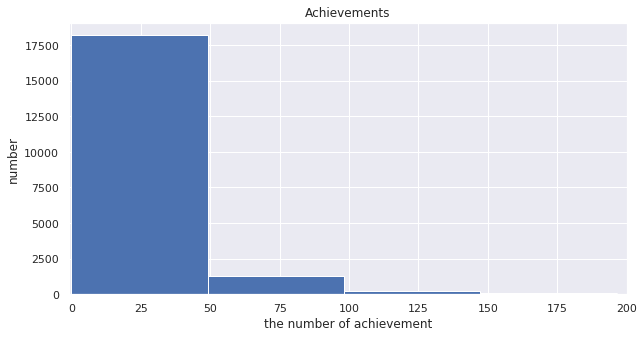

In [12]:
plt.figure(figsize=(10,5))
plt.hist(st.achievements,bins=200)
plt.xlim(right = 200)
plt.xlim(left = -1)
plt.title("Achievements")
plt.xlabel("the number of achievement")
plt.ylabel("number")

Text(0, 0.5, 'number')

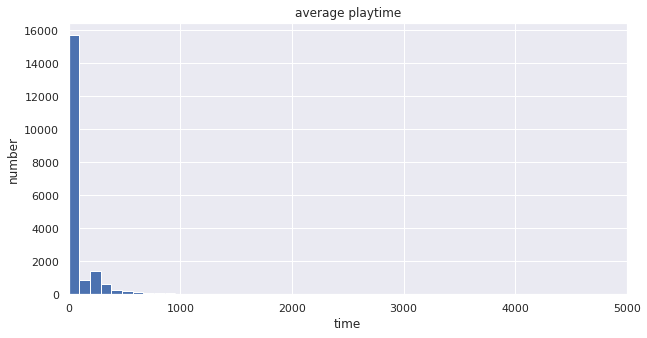

In [13]:
plt.figure(figsize=(10,5))
plt.hist(st.average_playtime,bins=2000)
plt.xlim(right = 5000)
plt.xlim(left = -1)
plt.title("average playtime")
plt.xlabel("time")
plt.ylabel("number")

Text(0, 0.5, 'number')

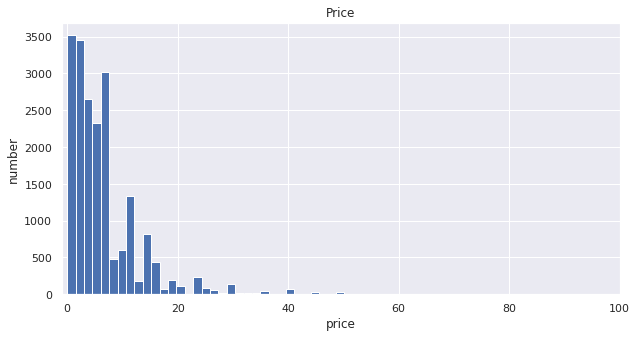

In [17]:
plt.figure(figsize=(10,5))
plt.hist(st.price,bins=200)
plt.xlim(right = 100)
plt.xlim(left = -1)
plt.title("Price")
plt.xlabel("price")
plt.ylabel("number")


In [0]:
def enco(data):
  reshape_data = data.to_numpy().reshape(-1,1)
  enc = preprocessing.OrdinalEncoder().fit(reshape_data)
  return enc.transform(reshape_data)

In [0]:
st.platforms = enco(st.platforms)
st.owners = enco(st.owners)

In [8]:
st.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners
0,1,Counter-Strike,1/11/00,1,Valve,Valve,5.0,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,7.19,3.0
1,2,Team Fortress Classic,1/4/99,1,Valve,Valve,5.0,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,3.99,11.0
2,3,Day of Defeat,1/5/03,1,Valve,Valve,5.0,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,3.99,11.0
3,4,Deathmatch Classic,1/6/01,1,Valve,Valve,5.0,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,3.99,11.0
4,5,Half-Life: Opposing Force,1/11/99,1,Gearbox Software,Valve,5.0,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,3.99,11.0


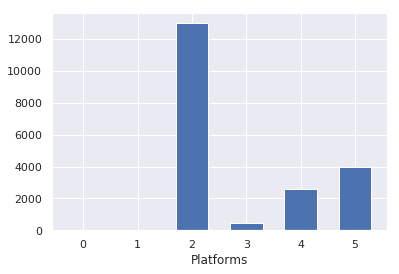

In [18]:
#plot 'platforms'
bins = np.arange(7) - 0.5
plt.hist(st.platforms, bins, rwidth = 0.6)

plt.xticks([0,1,2,3,4,5])
plt.xlabel('Platforms')
plt.show()

In [40]:
def cg_class(name,cg):
  st[name] = 0
  for i in range(0,19999):
    if cg in st.categories[i]:
      st[name][i] = 1

cg_class('Player', 'Multiplayer')
cg_class('VAC', 'Valve Anti-Cheat enabled')
cg_class('STC', 'Steam Trading Cards')
cg_class('PCS', 'Partial Controller Support')
cg_class('ISS', 'Includes Source SDK')
cg_class('Cloud', 'Steam Cloud')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [8]:
def genres_class(name,genres):
  st[name] = 0
  for i in range(0,19999):
    if genres in st.genres[i]:
      st[name][i] = 1

genres_class('Action', 'Action')
genres_class('Free', 'Free to Play')
genres_class('Strategy', 'Strategy')
genres_class('Adventure', 'Adventure')
genres_class('Indie', 'Indie')
genres_class('RPG', 'RPG')
genres_class('Casual', 'Casual')
genres_class('Racing', 'Racing')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [0]:
def scaler(data):
  reshape_data = data.to_numpy().reshape(-1,1)
  return preprocessing.MinMaxScaler().fit_transform(reshape_data)

In [0]:
st.positive_ratings = scaler(st.positive_ratings)
st.negative_ratings = scaler(st.negative_ratings)
st.average_playtime = scaler(st.average_playtime)
st.median_playtime = scaler(st.median_playtime)
st.price = scaler(st.price)

In [17]:
url = 'https://raw.githubusercontent.com/ovllya126/UTS_ML2019_ID13307095/master/st_modified3.csv'
url_s = requests.get(url).text
st = pd.read_csv(io.StringIO(url_s))
st.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners,players,VAC,STC,PCS,ISS,cloud,Player,Cloud,Action,Free,Strategy,Adventure,Indie,RPG,Casual,Racing
0,1,Counter-Strike,1/11/00,1,Valve,Valve,5,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,0.047093,0.006855,0.092391,0.001663,0.023652,10000000-20000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2,Team Fortress Classic,1/4/99,1,Valve,Valve,5,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,0.001255,0.001300,0.001453,0.000325,0.013125,5000000-10000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,Day of Defeat,1/5/03,1,Valve,Valve,5,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,0.001292,0.000817,0.000981,0.000178,0.013125,5000000-10000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,Deathmatch Classic,1/6/01,1,Valve,Valve,5,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,0.000481,0.000548,0.001353,0.000965,0.013125,5000000-10000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,Half-Life: Opposing Force,1/11/99,1,Gearbox Software,Valve,5,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,0.001985,0.000591,0.003273,0.002177,0.013125,5000000-10000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [25]:
st.dtypes

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms           float64
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
price               float64
owners              float64
dtype: object

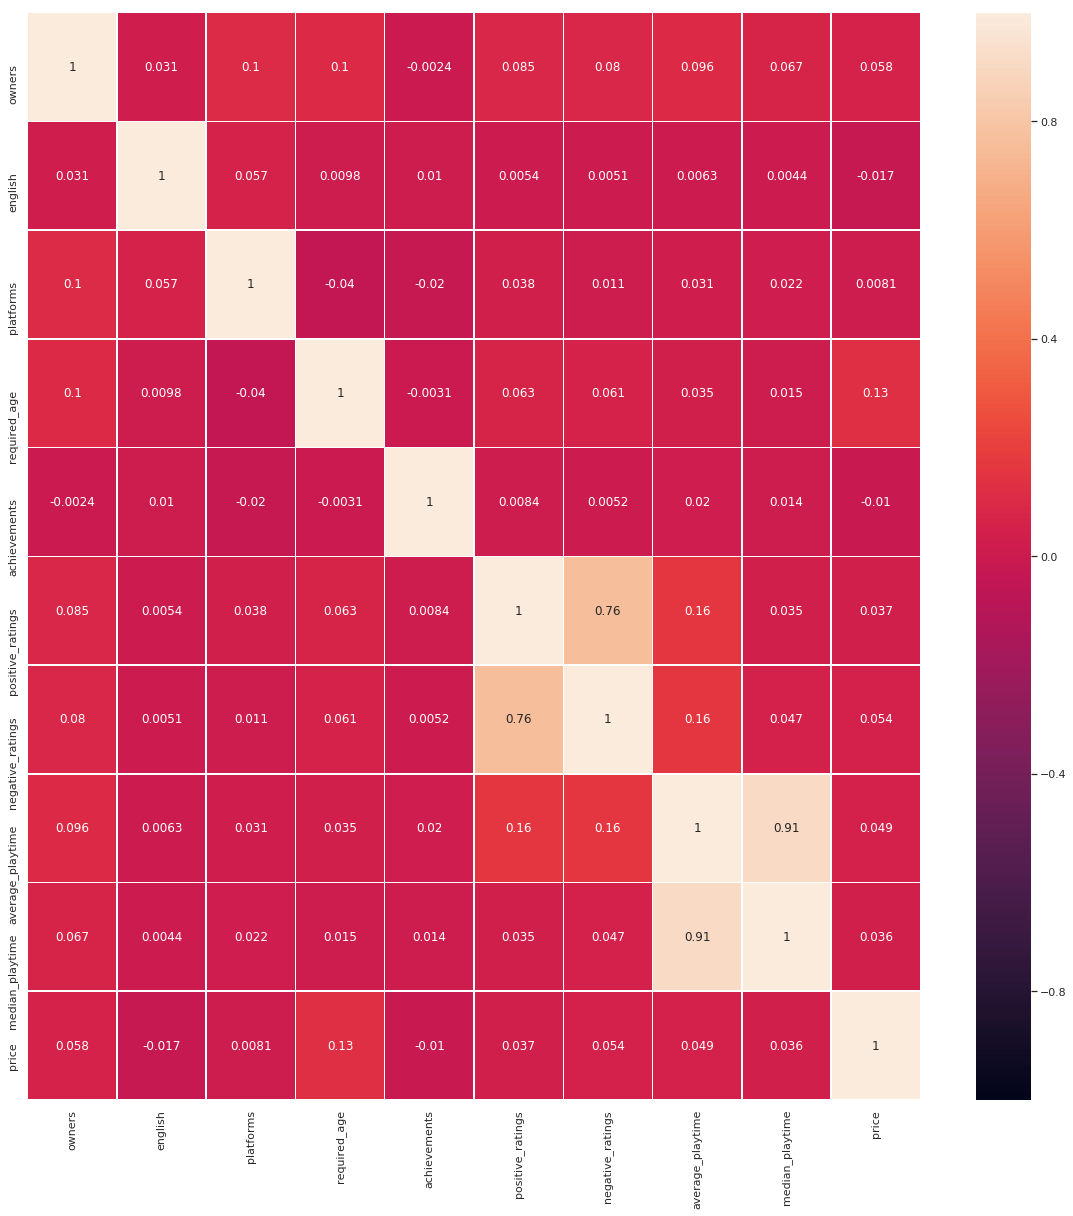

In [26]:

cols = ['owners','english','platforms',	'required_age', 'achievements',	'positive_ratings',	'negative_ratings',	'average_playtime',	'median_playtime',	'price' ]

selected_st = np.corrcoef(st[col].values.T)
plt.figure(figsize=(20,20))  
heatmap = sns.heatmap(selected_st, vmin=-1, vmax=1,annot=True, linewidths=.5, xticklabels=col ,yticklabels = col)

heatmap.figure.savefig('heatmap.png')

In [0]:
st_corr = st.corr()

col = ['owners','english','platforms',	'required_age', 'achievements',	'positive_ratings',	'negative_ratings',	'average_playtime',	'median_playtime',	'price', 'VAC',	'STC',	'PCS',	'ISS',	'Player'	,'Cloud',	'Action',	'Free'	,'Strategy'	,'Adventure',	'Indie',	'RPG',	'Casual',	'Racing' ]

selected_st = np.corrcoef(st[col].values.T)
plt.figure(figsize=(20,20))  
heatmap = sns.heatmap(selected_st, vmin=-1, vmax=1,annot=True, linewidths=.5, xticklabels=col ,yticklabels = col)

heatmap.figure.savefig('heatmap.png')

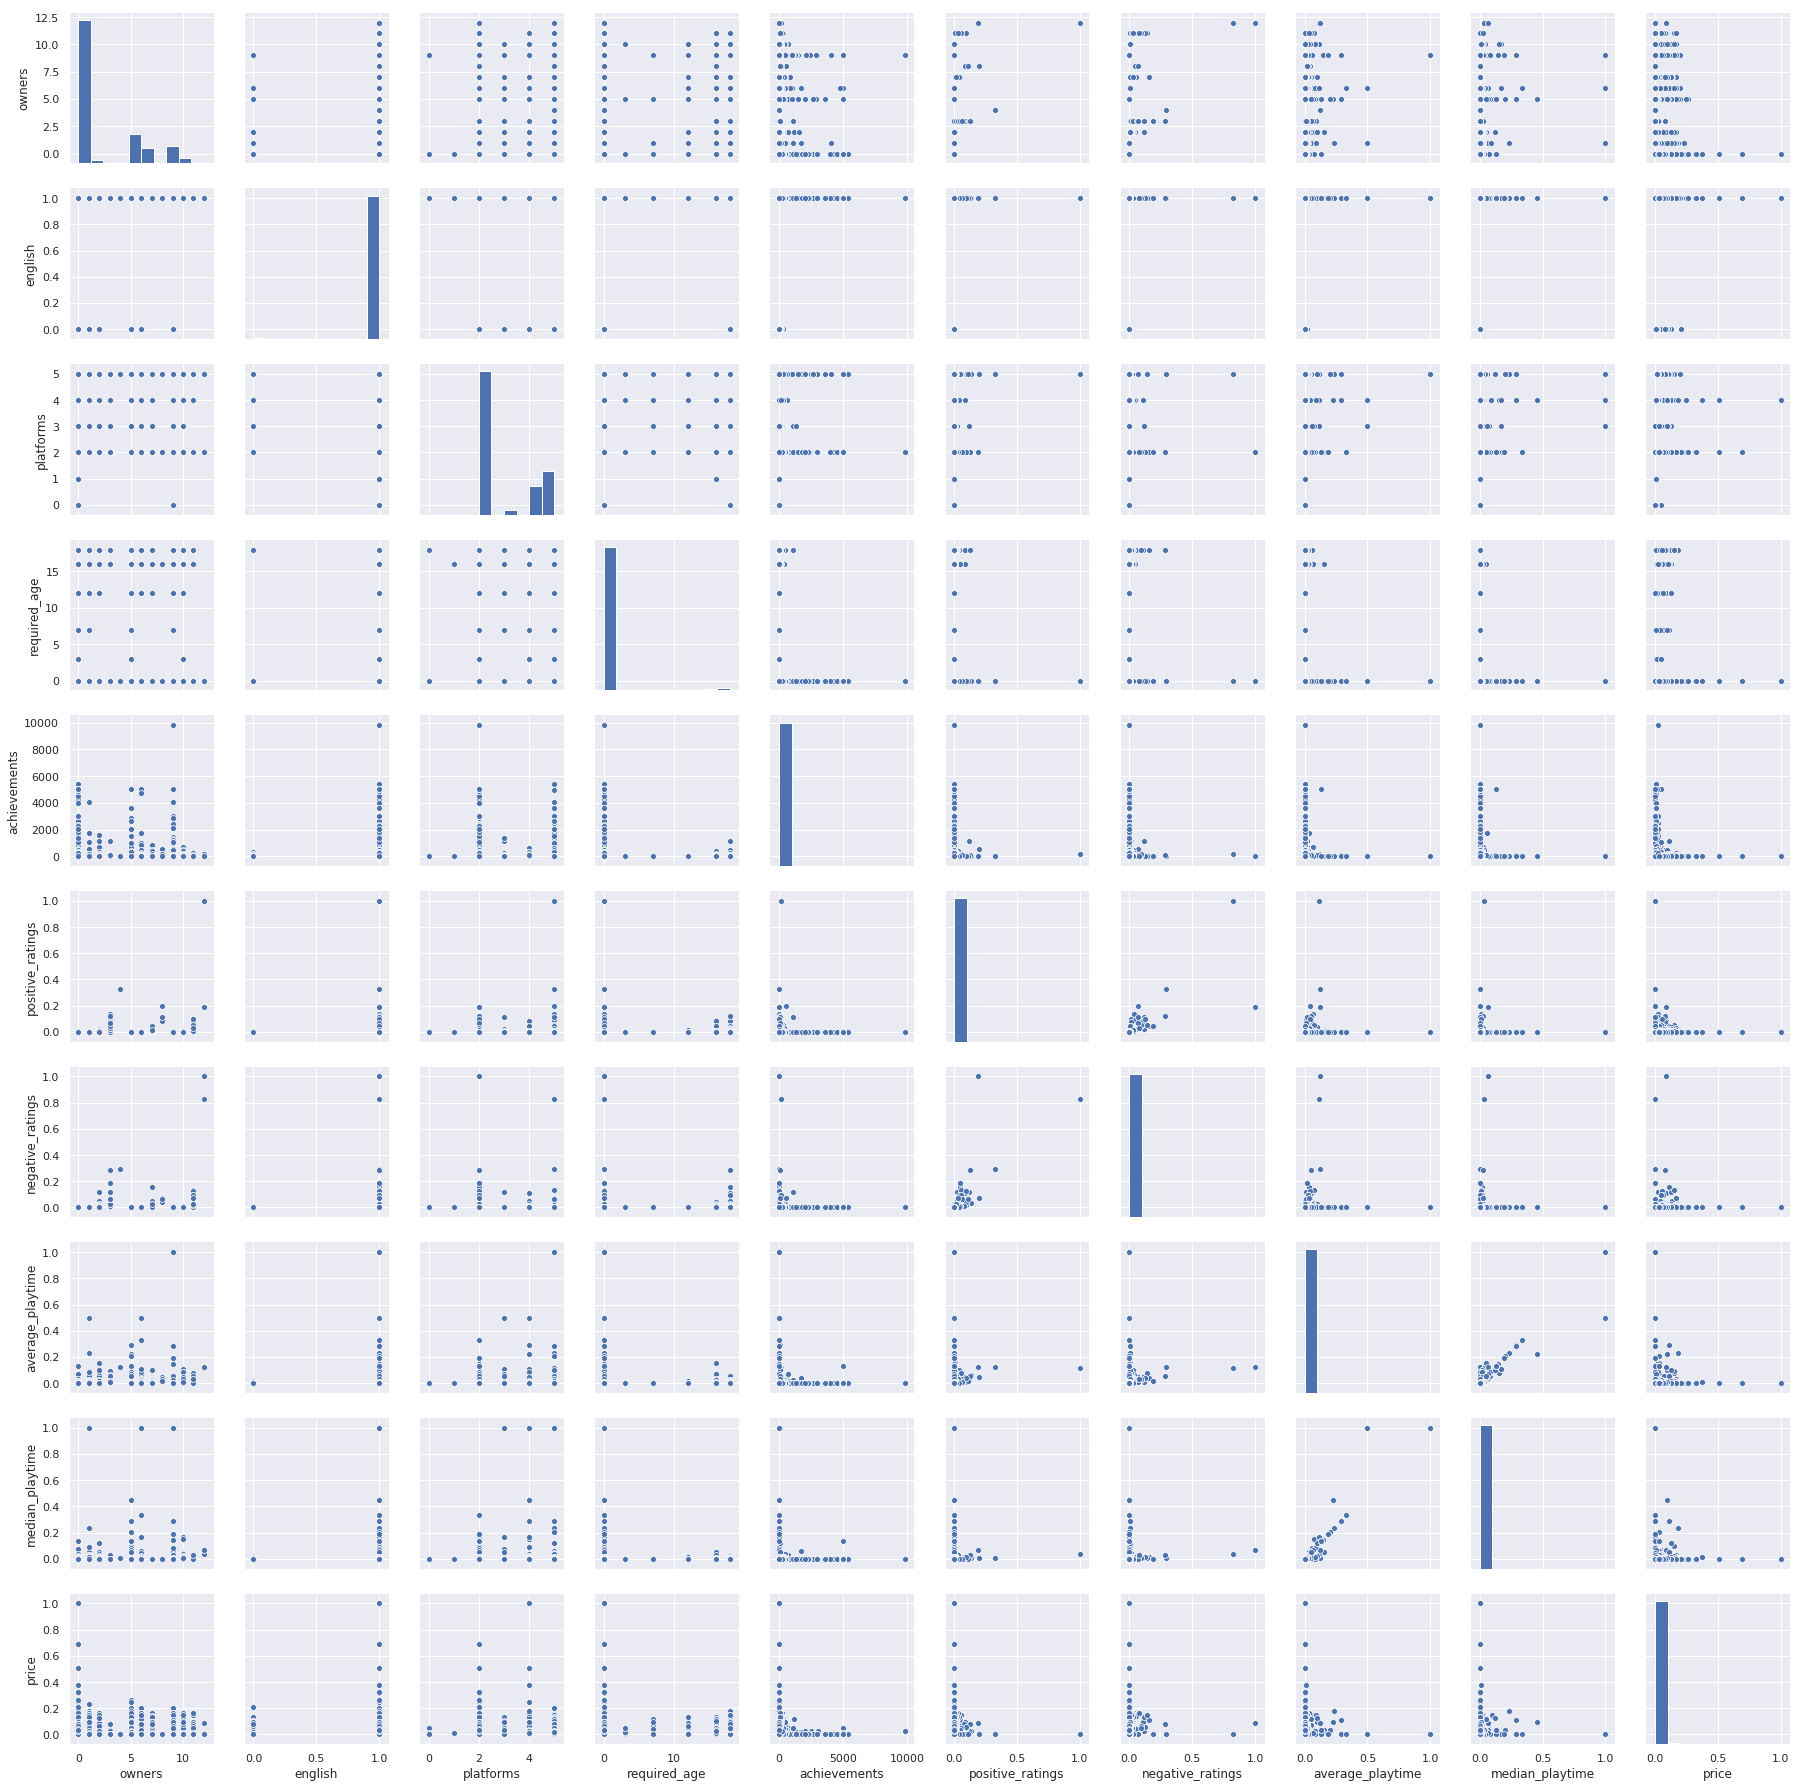

In [13]:
col1 = ['owners','english','platforms',	'required_age', 'achievements',	'positive_ratings',	'negative_ratings',	'average_playtime',	'median_playtime',	'price']
pairs1 = sns.pairplot(st[col1])



In [0]:
pairs1.savefig('pairs.png')

In [0]:
from google.colab import files

files.download('heatmap.png')

In [0]:
# import os

# print(os)
# print(os.getcwd())

# print(os.listdir(os.getcwd()))


# st.to_csv('st_modified1.csv')


In [0]:
st.to_csv('st_modified2.csv')

In [0]:
from google.colab import files

files.download('st_modified2.csv')


In [0]:
files.download('pairs.png')